# ___Local Outlier Factor (LOF)___

_LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation._

_This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points.
A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors._

_In the below feature space, LOF is able to identify P1 and P2 as outliers, which are local outliers to Cluster 2 (in addition to P3)._

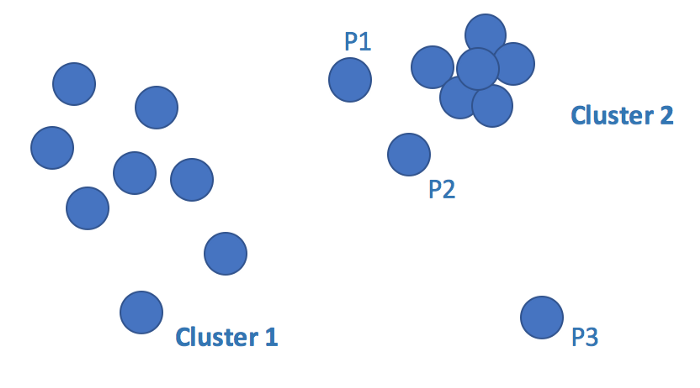

___The method, step-by-step:___

_For each point P, do the following:_

* _Calculate __distances between P and every other point__ (manhattan = |x1-x2| + |y1-y2|) = dist(p1,p2)_


* _Find the __Kth closest point__ (Kth nearest neighbor’s distance=K-Dist(P))_


* _Find the K closest points (those whose distances are smaller than the Kth point), the __K-distance neighborhood of P, Nk(P)__._


* _Find its density __(Local Reachability Density= LRDk(p)__ — a measure of how close its neighbors are to it), basically the inverse of the avg distance between point p and its neighbors. The lower the density, the farther p is from its neighbors._


* _Find its local outlier factor, __LOFk(p), as sum(reachability distances of neighbors to P) x sum(densities of neighbors)__. LOFk(P) is basically the sum of the distances between P and its neighboring points, weighted by the sum those points’ densities (how far they are from their k neighboring points)._

### ___k-distance___
_With this k defined, we can introduce the k-distance which is the distance of a point to its kth neighbor. If k was 3, the k-distance would be the distance of a point to the third closest point._
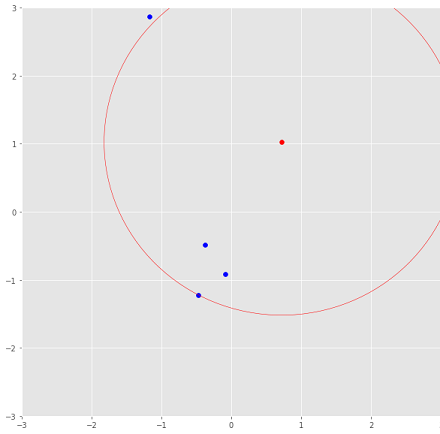

### ___Reachability distance___
_The k-distance is now used to calculate the reachability distance. This distance measure is simply the maximum of the distance of two points and the k-distance of the second point._

$$reach-dist(a,b) = max(k-distance(b), dist(a,b))$$

_Basically, if point a is within the k neighbors of point b, the reach-dist(a,b) will be the k-distance of b. Otherwise, it will be the real distance of a and b. This is just a “smoothing factor”. For simplicity, consider this the usual distance between two points._

### ___Local reachability density___
_The reach-dist is then used to calculate still another concept — the local reachability density (lrd). To get the lrd for a point a, we will first calculate the reachability distance of a to all its k nearest neighbors and take the average of that number. The lrd is then simply the inverse of that average. Remember that we are talking about densities and, therefore, the longer the distance to the next neighbors, the sparser the area the respective point is located in. Hence, the less dense — the inverse._
$$lrd(a) = 1/(sum(reach-dist(a,n))/k)$$
_By intuition the local reachability density tells how far we have to travel from our point to reach the next point or cluster of points. The lower it is, the less dense it is, the longer we have to travel._

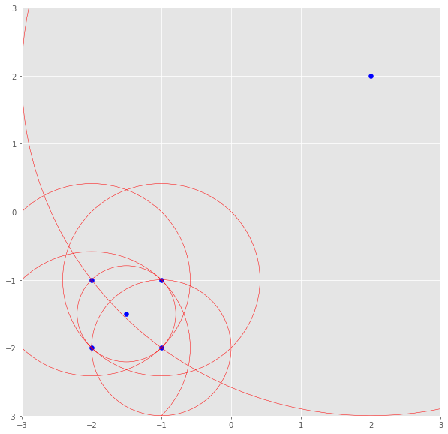

### ___LOF___
_The lrd of each point will then be compared to the lrd of their k neighbors. More specifically, k ratios of the lrd of each point to its neighboring points will be calculated and averaged. The LOF is basically the average ratio of the lrds of the neighbors of a to the lrd of a. If the ratio is greater than 1, the density of point a is on average smaller than the density of its neighbors and, thus, from point a, we have to travel longer distances to get to the next point or cluster of points than from a’s neighbors to their next neighbors. Keep in mind, the neighbors of a point a may don’t consider a a neighbor as they have points in their reach which are way closer._

_In conclusion, the LOF of a point tells the density of this point compared to the density of its neighbors. If the density of a point is much smaller than the densities of its neighbors (LOF ≫1), the point is far from dense areas and, hence, an outlier._

### ___Adjusting K___
* _Increase K too much and you’re just looking for outliers with respect to the entire dataset, so points far away from the highest density regions could be misclassified as outliers, even though they themselves reside in a cluster of points._
* _Reduce K too much and you’re looking for outliers with respect to very small local regions of points. This could also lead to the misclassification as outliers._

## ___Mall Customer Anomaly Detection___

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-pastel')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Mall_Customers.csv')
data.head()

data.columns

data=data.drop('CustomerID',axis=1)
data=data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spend_Score'})

df=pd.get_dummies(data)
df

,Age,Income,Spend_Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [4]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5, contamination=.1)
y_pred = clf.fit_predict(df)

In [5]:
LOF_Scores = clf.negative_outlier_factor_
LOF_Scores

array([-1.42585756, -0.99742473, -1.46837153, -1.00533971, -1.16723253,
       -0.99742473, -1.21452925, -1.3521561 , -1.10515538, -0.95137294,
       -1.09890967, -1.35368373, -1.03869436, -1.01332283, -1.13213802,
       -0.99742473, -1.0427422 , -1.18687934, -0.98496448, -1.27923596,
       -0.98084371, -0.95051744, -1.02296694, -0.99443845, -0.97358957,
       -1.03966129, -1.0195712 , -1.30301698, -1.01747324, -1.1332611 ,
       -0.96551299, -1.04396513, -0.94717307, -1.07908906, -0.94612688,
       -1.04464556, -1.00616113, -1.03267914, -1.04455289, -1.06216176,
       -1.57426397, -1.15620202, -1.1639725 , -1.08788309, -1.08523079,
       -1.12414754, -1.07251925, -0.9998005 , -1.06323894, -1.07541928,
       -0.99778634, -1.08345137, -1.02597221, -1.11395521, -1.013868  ,
       -1.01766881, -0.9916795 , -1.00826534, -1.03739224, -1.00185315,
       -1.01645055, -1.11692233, -1.07312681, -1.0782837 , -0.9354126 ,
       -1.17912293, -1.02776896, -0.99883199, -1.16674805, -0.98

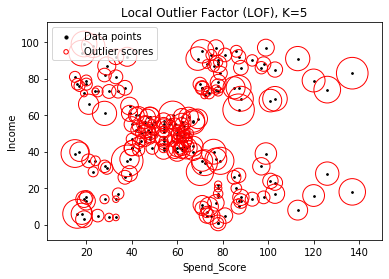

In [11]:
plt.title('Local Outlier Factor (LOF), K=5')
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], color='k', s=3., label='Data points')
radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() -LOF_Scores.min())
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], s=1000 * radius, edgecolors='r',
         facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.ylabel('{}'.format(df.columns[1]))
plt.xlabel('{}'.format(df.columns[2]))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show();

In [14]:
def LOF_plot(k):
    clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
    y_pred = clf.fit_predict(df)
    LOF_Scores = clf.negative_outlier_factor_

    plt.title('Local Outlier Factor (LOF), K={}'.format(k))
    plt.scatter(df.iloc[:, 1], df.iloc[:, 2], color='k', s=3., label='Data points')
    radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() -LOF_Scores.min())
    plt.scatter(df.iloc[:, 1], df.iloc[:, 2], s=1000 * radius, edgecolors='r',
             facecolors='none', label='Outlier scores')
    plt.axis('tight')
    plt.ylabel('{}'.format(df.columns[1]))
    plt.xlabel('{}'.format(df.columns[2]))
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.show();

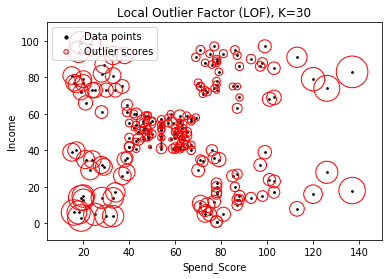

In [16]:
LOF_plot(30)

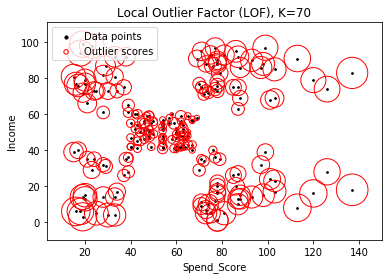

In [17]:
LOF_plot(70)

_From the above, observe how too small of a K results in too many points having high LOFs (circle radius does not fluctuate as much as one would think). Too high of a K results in those points in the four outer clusters having high LOFs because of being too far from the main cluster of points. K=30 offers a balance of the two extremes._

In [18]:
clf = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = clf.fit_predict(df)
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=df[LOF_pred==1]

Text(0, 0.5, 'Spend_Score')

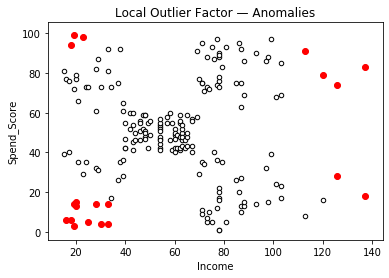

In [21]:
plt.scatter(df.iloc[:,1],df.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(LOF_anomalies.iloc[:,1],LOF_anomalies.iloc[:,2],c='red')
plt.title('Local Outlier Factor — Anomalies')
plt.xlabel('Income')
plt.ylabel('Spend_Score')

___IMPORTANT___

___novelty___ _: bool, default=False_

_By default, LocalOutlierFactor is only meant to be used for outlier detection (novelty=False). Set novelty to True if you want to use LocalOutlierFactor for novelty detection. In this case be aware that that you should only use predict, decision_function and score_samples on new unseen data and not on the training set._